In [2]:
!pip install vaderSentiment
!pip install tf-nightly-2.0-preview
import csv
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tensorflow as tf
import numpy
from numpy import array
from tensorflow.keras.optimizers import RMSprop, Ftrl, Adagrad, SGD, Adadelta, Adam, Adamax, Nadam
print(tf.__version__)



2.0.0-dev20191002


1/3/00
12/5/17


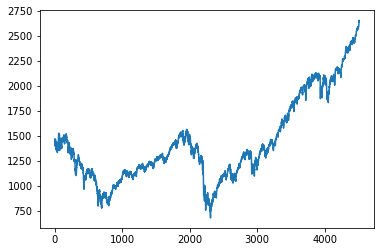

In [5]:
#Read S&P data for csv file
with open("/tmp/SPIndex.csv") as csvfile:
    readCSV = csv.reader(csvfile, delimiter=",")
    next(readCSV)
    dates = []
    openf = []
    high = []
    low = []
    close = []
    adjclose = []
    volume = []
    for row in readCSV:
        dates.append(row[0])
        openf.append(row[1])
        high.append(row[2])
        low.append(row[3])
        close.append(row[4])
        adjclose.append(row[5])
        volume.append(row[6])
openf = list(map(float, openf))
close = list(map(float,close))
x = list(range(1,4512))
plt.plot(x,openf)
print(dates[0])
print(dates[4510])

In [0]:
#Read news data from CSV file
with open("/tmp/news.csv") as newscsv:
    readCSVnews = csv.reader(newscsv, delimiter=",")
    next(readCSVnews)
    newsdate = []
    newslabel = []
    top1 = []
    top2 = []
    top3 = []
    top4 = []
    top5 = []
    top6 = []
    top7 = []
    top8 = []
    top9 = []
    top10 = [] 

    for row in readCSVnews:
      newsdate.append(row[0])
      newslabel.append(row[1])
      top1.append(row[2][2:-1])
      top2.append(row[3][2:-1])
      top3.append(row[4][2:-1])
      top4.append(row[5][2:-1])
      top5.append(row[6][2:-1])
      top6.append(row[7][2:-1])
      top7.append(row[8][2:-1])
      top8.append(row[9][2:-1])
      top9.append(row[10][2:-1])
      top10.append(row[11][2:-1])


In [0]:
#change date format for SPindex dates
spdate = []
for x in dates:
  maxlength = len(x)
  year = "20" + x[maxlength-2:maxlength]
  slash1loc = x.find('/')
  slash2loc = x.find('/',slash1loc+1)
  month = x[:slash1loc]
  day = x[slash1loc+1:slash2loc]
  if len(month) == 1:
    month = "0" + month
  if len(day) == 1:
    day = "0"+ day
  spdate.append(year+month+day)

In [0]:
#change date format for news dates
ndate = []
for x in newsdate:
  ndate.append(x[:4]+x[5:7]+x[8:10])
  

In [9]:
#Print out length of list before cleaning
print("length of spdate is {}".format(len(spdate)))
print("length of newsdate is {}".format(len(ndate)))
print("length of openf is {}".format(len(openf)))
print("length of close is {}".format(len(close)))

length of spdate is 4511
length of newsdate is 1989
length of openf is 4511
length of close is 4511


In [0]:
initdel = spdate.index(ndate[0])
for i in spdate[:initdel]:
  spdate.remove(i)
for i in openf[:initdel]:
  openf.remove(i)
for i in close[:initdel]:
  close.remove(i)

In [11]:
finaldel = spdate.index(ndate[-1])+1
print(finaldel)
for i in spdate[finaldel:]:
  spdate.remove(i)
for i in openf[finaldel:]:
  openf.remove(i)
for i in close[finaldel:]:
  close.remove(i)

1989


In [12]:
#Print out length list after cleaning
print("length of spdate is {}".format(len(spdate)))
print("length of newsdate is {}".format(len(ndate)))
print("length of nopenf is {}".format(len(openf)))
print("length of close is {}".format(len(close)))

length of spdate is 1989
length of newsdate is 1989
length of nopenf is 1989
length of close is 1989


In [0]:
analyser = SentimentIntensityAnalyzer()

In [14]:
#Assign values to top 6 news each day from sentiment analysis
dailyscore = []
for a,b,c,d,e,f,g,h,i,j in zip(top1,top2,top3,top4,top5,top6,top7,top8,top9,top10):
  tmpscorelist = [(analyser.polarity_scores(a)['compound'] +1) /2,(analyser.polarity_scores(b)['compound']+1) /2,
                  (analyser.polarity_scores(c)['compound'] +1) /2,(analyser.polarity_scores(d)['compound'] +1) /2,
                  (analyser.polarity_scores(e)['compound'] +1) /2,(analyser.polarity_scores(f)['compound'] +1) /2,
                  (analyser.polarity_scores(g)['compound'] +1) /2,(analyser.polarity_scores(h)['compound'] +1) /2,
                  (analyser.polarity_scores(i)['compound'] +1) /2,(analyser.polarity_scores(j)['compound'] +1) /2]
  dailyscore.append(tmpscorelist)

print(dailyscore[1])

[0.9077999999999999, 0.3409, 0.7202, 0.40175, 0.5, 0.25305, 0.24469999999999997, 0.4614, 0.3211, 0.32999999999999996]


In [0]:
upordown = [] #up as 1 down as 0
for x,y in zip(openf,close):
  if (y > x):
    upordown.append([1,0,0])
  elif (y == x):
    upordown.append([0,0,0])
  else:
    upordown.append([0,1,0])

change = [] #close-open range 0 to 1
for x,y in zip(openf,close):
  change.append((y-x+100)/200) 



In [0]:
xtrain = array(dailyscore[:1650])
ytrain = array(change[1:1651])
xvalid = array(dailyscore[1650:1900])
yvalid = array(change[1651:1901])
xtrain2 = array(dailyscore[300:1300])
ytrain2 = array(upordown[301:1301])
xvalid2 = array(dailyscore[1300:1325])
yvalid2 = array(upordown[1301:1326])
train_dataset = tf.data.Dataset.from_tensor_slices((xtrain, ytrain)).batch(100)
valid_dataset = tf.data.Dataset.from_tensor_slices((xvalid, yvalid)).batch(100)


train_dataset2 = tf.data.Dataset.from_tensor_slices((xtrain2, ytrain2)).batch(5)
valid_dataset2 = tf.data.Dataset.from_tensor_slices((xvalid2, yvalid2)).batch(5)


In [71]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(1024),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation="relu"),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dropout(0.1),
  #tf.keras.layers.Dense(128, activation="relu"),
  #tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(3, activation= "softmax")
])


#model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-5),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer=Ftrl(lr=1e-8),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer=Adagrad(lr = 1e-2),metrics=['binary_accuracy'])
model.compile(loss='binary_crossentropy',optimizer= SGD(lr = 5e-3),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer= Adadelta(lr = 1e-3),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer= Adam(lr=1e-3),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer= Adamax(lr=5e-3),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer= Nadam(lr=1e-4),metrics=['binary_accuracy'])
history = model.fit(train_dataset2,validation_data = valid_dataset2,epochs=1500,verbose=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [0]:
#conv1D + lstm
tf.keras.backend.clear_session()
tf.random.set_seed(51)


model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
  #tf.keras.layers.Conv1D(filters=32, kernel_size=5,strides=1, padding="causal",activation="relu",input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax")
])


#model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer=Ftrl(lr=1e-12),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer=Adagrad(lr = 1e-2),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer= SGD(lr = 1e-3),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer= Adadelta(lr = 5e-1),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer= Adam(lr=1e-2),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer= Adamax(lr=1e-3),metrics=['binary_accuracy'])
#model.compile(loss='binary_crossentropy',optimizer= Nadam(lr=1e-2),metrics=['binary_accuracy'])
history = model.fit(train_dataset2,validation_data = valid_dataset2,epochs=100,verbose=0)

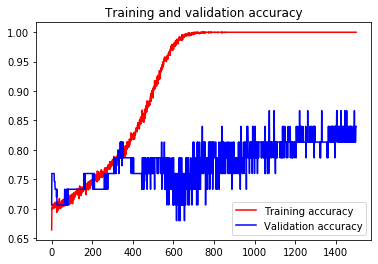

<Figure size 432x288 with 0 Axes>

In [72]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

startpoint = 0
epochs = range(len(acc))

plt.plot(epochs[startpoint:], acc[startpoint:], 'r', label='Training accuracy')
plt.plot(epochs[startpoint:], val_acc[startpoint:], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

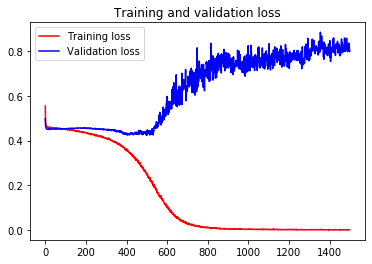

<Figure size 432x288 with 0 Axes>

In [74]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
startpoint = 0
plt.plot(epochs[startpoint:], loss[startpoint:], 'r', label='Training loss')
plt.plot(epochs[startpoint:], val_loss[startpoint:], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
a = 1711
while a < 1760:
  prediction = model.predict(array(dailyscore[a-1])[numpy.newaxis])
  print("actual: {} ; Prediction: {}".format(change[a],prediction))
  a = a + 1

In [73]:
a = 1327
b = 1332
while a < b:
  prediction = model.predict(array(dailyscore[a-1])[numpy.newaxis]).round()
  print("actual: {} ; Prediction: {}".format(upordown[a],prediction))
  a = a + 1

actual: [1, 0, 0] ; Prediction: [[1. 0. 0.]]
actual: [1, 0, 0] ; Prediction: [[1. 0. 0.]]
actual: [0, 1, 0] ; Prediction: [[1. 0. 0.]]
actual: [0, 1, 0] ; Prediction: [[0. 1. 0.]]
actual: [0, 1, 0] ; Prediction: [[1. 0. 0.]]
